In [1]:
# imports
from math import factorial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def combinacao(Total,var):
    return factorial(Total)/(factorial(Total-var)*factorial(var))

def get_prob(NQ,TQ,Q):
    a = (factorial(NQ)*factorial(TQ-8))/(factorial(TQ)*factorial(NQ-Q))
    b = a*((TQ-NQ)**(8-Q))
    c = factorial(8)/(factorial(8-Q)*factorial(Q))
    d = b*c
    return d

def get_prob2(NQ,TQ,Q):
    a = (factorial(NQ)*factorial(TQ-8))/(factorial(TQ)*factorial(NQ-Q))
    b = (factorial(TQ-NQ)/factorial(TQ-NQ-(8-Q)))
    c = combinacao(8,8-Q)
    d = a*b*c
    return d

def argmax(l):
    index, max_val = -1, -1
    for i in range(len(l)):
        if l[i] > max_val:
            index, max_val = i, l[i]
    return index 

In [3]:
num_pessoas = 1
NQ = 32
TQ = 40
prob_list = [[40,0,0,0,0,0,0,0,0,1]]
column = ["Missing Questions",'P(Q = 0)', 'P(Q = 1)', 'P(Q = 2)', 'P(Q = 3)', 'P(Q = 4)', 'P(Q = 5)', 'P(Q = 6)', 'P(Q = 7)', 'P(Q = 8)']
inde = [0]
r_zero = 1
num_old = 0
vect_NQ = [40,32]
vect_people = [0,1]
while (NQ >= 1):
    q_list_p = [0,0,0,0,0,0,0,0,0]

    for Q in range(min([NQ,8]),-1,-1):
        q_list_p[Q] = get_prob2(NQ,TQ,Q)

    num_new = argmax(q_list_p)
    if( (num_old == 0) and (num_new == 0) ):
        r_zero += 1
        q_list_p[0] = q_list_p[0]**r_zero 
        num_new = argmax(q_list_p)
    else:
        num_new = argmax(q_list_p)
        r_zero = 1

    NQ = NQ - argmax(q_list_p)
    
    q_list_p.insert(0,NQ+argmax(q_list_p))
    inde.append(num_pessoas)
    prob_list.append(q_list_p)
    num_pessoas += 1
    num_old = num_new
    vect_NQ.append(NQ)
    vect_people.append(num_pessoas)
    if(num_pessoas>30):
        break
prob_list_df = pd.DataFrame(np.array(prob_list),columns=column,index=inde)
print(num_pessoas)
prob_list_df

25


,Missing Questions,P(Q = 0),P(Q = 1),P(Q = 2),P(Q = 3),P(Q = 4),P(Q = 5),P(Q = 6),P(Q = 7),P(Q = 8)
0,40.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00
1,32.0,1.300311e-08,0.000003,0.000181,0.003612,0.032731,0.146637,0.329933,3.501327e-01,1.367706e-01
2,25.0,8.367501e-05,0.002092,0.019524,0.089811,0.224528,0.314339,0.241799,9.375892e-02,1.406384e-02
3,20.0,1.638002e-03,0.020160,0.095760,0.229824,0.305235,0.229824,0.095760,2.016002e-02,1.638002e-03
4,16.0,9.563410e-03,0.072007,0.210020,0.309503,0.251471,0.114958,0.028740,3.570134e-03,1.673500e-04
5,13.0,2.886788e-02,0.150113,0.300226,0.300226,0.163166,0.048950,0.007832,6.024600e-04,1.673500e-05
6,11.0,5.581123e-02,0.223245,0.339721,0.254790,0.101916,0.021951,0.002439,1.244398e-04,2.145513e-06
7,9.0,1.025780e-01,0.307734,0.344662,0.185587,0.051552,0.007365,0.000508,1.451147e-05,1.170280e-07
8,7.0,1.805372e-01,0.388849,0.302438,0.108014,0.018623,0.001490,0.000048,4.291026e-07,0.000000e+00
9,6.0,2.360871e-01,0.419710,0.262319,0.072364,0.009045,0.000467,0.000007,0.000000e+00,0.000000e+00


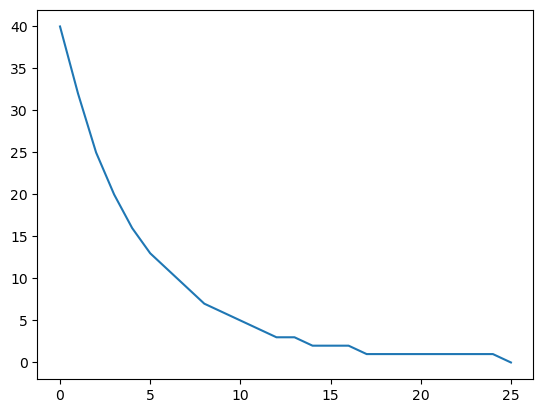

In [4]:
xpoints = np.array(vect_people)
ypoints = np.array(vect_NQ)

plt.plot(xpoints, ypoints)
plt.show()